# Setup

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Import the Datasets

In [124]:
df_vaders = pd.read_csv("data/vaders.csv");
df_textblob = pd.read_csv("data/textblob.csv");
df_topEmotions = pd.read_csv("data/emotionLex_topEmotions.csv");
df_emotionCount = pd.read_csv("data/emotionLex_emotionCount.csv");
df_affectFrequency = pd.read_csv("data/emotionLex_affectFrequency.csv");

# Define Functions

In [138]:
def pipeAccuracy(df, vectorizer, features, target, test_size, random_state, model):
    X_train, X_test, y_train, y_test = train_test_split(
        df[features], 
        df[target],
        test_size=test_size, 
        random_state=random_state
    );
    pipe = Pipeline([
        ('vectorizer', vectorizer),
        ('model', model)
    ]);
    pipe.fit(X_train, y_train);
    pipeScore = pipe.score(X_test, y_test);
    return pipeScore;

In [183]:
def pipeAccuracy_Results(df, vectorizer, features, target, test_size, random_state, model):
    X_train, X_test, y_train, y_test = train_test_split(
        df[features], 
        df[target],
        test_size=test_size, 
        random_state=random_state
    );
    pipe = Pipeline([
        ('vectorizer', vectorizer),
        ('model', model)
    ]);
    pipe.fit(X_train, y_train);
    pipeScore = pipe.score(X_test, y_test);
    print("Pipe Score: " + str(pipeScore))
    
    y_pred = pipe.predict(X_test);
    print(classification_report(y_test, y_pred, zero_division=0));
    
    data = confusion_matrix(y_test, y_pred);
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test));
    df_cm.index.name = 'Actual';
    df_cm.columns.name = 'Predicted';
    chart = sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False, vmax=np.max(data), square=True, fmt="d", cmap="Reds");
    return chart;

# VADERS

In [126]:
print(df_vaders.info())
df_vaders.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reviewer Name         324 non-null    object 
 1   Reviewer Title        324 non-null    object 
 2   Total Reviews Given   324 non-null    int64  
 3   Review                324 non-null    object 
 4   Stars Given           324 non-null    int64  
 5   Year of Review        324 non-null    int64  
 6   Time of Review        324 non-null    object 
 7   Webscraping Datetime  324 non-null    object 
 8   Review Cleaned        324 non-null    object 
 9   Negative              324 non-null    float64
 10  Neutral               324 non-null    float64
 11  Positive              324 non-null    float64
 12  Compound              324 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 33.0+ KB
None


,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review,Time of Review,Webscraping Datetime,Review Cleaned,Negative,Neutral,Positive,Compound
0,Alex Reyes,No Title,2,No Review,3,2022,a month ago,2023-01-29 20:55:10,review,0.0,1.000,0.000,0.0000
1,Hugo Nakamura,Local Guide,25,"EDIT: The second time coming to the store, the...",5,2022,a month ago,2023-01-29 20:55:10,edit second time coming store employee kind he...,0.0,0.438,0.562,0.8402


In [127]:
def manualClassification_Vaders(df):
    dff = df.copy();
    dff['Classification'] = "neutral";
    for i in dff.index:
        if dff.loc[i,'Compound'] < 0:
            dff.loc[i, 'Classification'] = "negative";
        elif dff.loc[i, 'Compound'] > 0:
            dff.loc[i, 'Classification'] = "positive";
    return dff;

dff_vaders = manualClassification_Vaders(df_vaders);
dff_vaders.head(2)

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review,Time of Review,Webscraping Datetime,Review Cleaned,Negative,Neutral,Positive,Compound,Classification
0,Alex Reyes,No Title,2,No Review,3,2022,a month ago,2023-01-29 20:55:10,review,0.0,1.000,0.000,0.0000,neutral
1,Hugo Nakamura,Local Guide,25,"EDIT: The second time coming to the store, the...",5,2022,a month ago,2023-01-29 20:55:10,edit second time coming store employee kind he...,0.0,0.438,0.562,0.8402,positive


# Textblob

In [128]:
print(df_textblob.info())
df_textblob.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reviewer Name         324 non-null    object 
 1   Reviewer Title        324 non-null    object 
 2   Total Reviews Given   324 non-null    int64  
 3   Review                324 non-null    object 
 4   Stars Given           324 non-null    int64  
 5   Year of Review        324 non-null    int64  
 6   Time of Review        324 non-null    object 
 7   Webscraping Datetime  324 non-null    object 
 8   Review Cleaned        324 non-null    object 
 9   Polarity              324 non-null    float64
 10  Subjectivity          324 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 28.0+ KB
None


,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review,Time of Review,Webscraping Datetime,Review Cleaned,Polarity,Subjectivity
0,Alex Reyes,No Title,2,No Review,3,2022,a month ago,2023-01-29 20:55:10,review,0.0,0.0


In [129]:
def manualClassification_Textblob(df, column):
    dff = df.copy();
    if column == "Polarity":
        dff['Classification'] = "neutral";
        for i in dff.index:
            if dff.loc[i, column] < 0:
                dff.loc[i, 'Classification'] = "negative";
            elif dff.loc[i, column] > 0:
                dff.loc[i, 'Classification'] = "positive";
    elif column == "Subjectivity":
        dff['Classification'] = "";
        for i in dff.index:
            if dff.loc[i, 'Polarity'] != 0:
                if dff.loc[i,column] < 0.5:
                    dff.loc[i, 'Classification'] = "constructive";
                elif dff.loc[i, column] > 0.5:
                    dff.loc[i, 'Classification'] = "subjective";
            else:
                dff.loc[i, 'Classification'] = "inconclusive";
    return dff;

dff_textblob_polarity = manualClassification_Textblob(df_textblob, "Polarity");
dff_textblob_polarity.head(2)

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review,Time of Review,Webscraping Datetime,Review Cleaned,Polarity,Subjectivity,Classification
0,Alex Reyes,No Title,2,No Review,3,2022,a month ago,2023-01-29 20:55:10,review,0.000000,0.000000,neutral
1,Hugo Nakamura,Local Guide,25,"EDIT: The second time coming to the store, the...",5,2022,a month ago,2023-01-29 20:55:10,edit second time coming store employee kind he...,0.366667,0.633333,positive


# Emotion Lexicon

In [130]:
print(df_emotionCount.info())
df_emotionCount.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reviewer Name         324 non-null    object
 1   Reviewer Title        324 non-null    object
 2   Total Reviews Given   324 non-null    int64 
 3   Review                324 non-null    object
 4   Stars Given           324 non-null    int64 
 5   Year of Review        324 non-null    int64 
 6   Time of Review        324 non-null    object
 7   Webscraping Datetime  324 non-null    object
 8   Review Cleaned        324 non-null    object
 9   fear                  324 non-null    int64 
 10  anger                 324 non-null    int64 
 11  anticipation          324 non-null    int64 
 12  trust                 324 non-null    int64 
 13  surprise              324 non-null    int64 
 14  positive              324 non-null    int64 
 15  negative              324 non-null    in

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review,Time of Review,Webscraping Datetime,Review Cleaned,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy
0,Alex Reyes,No Title,2,No Review,3,2022,a month ago,2023-01-29 20:55:10,review,0,0,0,0,0,0,0,0,0,0


In [131]:
def manualClassification_emotionLex(df, positive_emotions, negative_emotions):
    emotion_list = [];
    for emotion in positive_emotions:
        emotion_list.append(emotion);
    for emotion in negative_emotions:
        emotion_list.append(emotion);
    
    dff = df.copy();
    dff['Classification'] = "";
    for i in dff.index:
        neutral_score = np.sum(dff.loc[i, emotion_list]);
        positive_score = np.sum(dff.loc[i, positive_emotions]);
        negative_score = np.sum(dff.loc[i, negative_emotions]);
        if (neutral_score == 0) | (positive_score == negative_score):
            dff.loc[i, "Classification"] = "neutral";
        elif positive_score > negative_score:
            dff.loc[i, "Classification"] = "positive";
        elif positive_score < negative_score:
            dff.loc[i, "Classification"] = "negative";
    return dff;

dff_emotionCount_polarity = manualClassification_emotionLex(
    df=df_emotionCount, 
    positive_emotions=['trust','surprise','positive','joy'],
    negative_emotions=['fear','anger','anticipation','negative','sadness','disgust'], 
)
dff_emotionCount_polarity.head(2)

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review,Time of Review,Webscraping Datetime,Review Cleaned,fear,anger,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,Classification
0,Alex Reyes,No Title,2,No Review,3,2022,a month ago,2023-01-29 20:55:10,review,0,0,0,0,0,0,0,0,0,0,neutral
1,Hugo Nakamura,Local Guide,25,"EDIT: The second time coming to the store, the...",5,2022,a month ago,2023-01-29 20:55:10,edit second time coming store employee kind he...,0,0,3,2,0,4,0,0,0,3,positive


# Experiment - Positive, Negative, Neutral
Resources:
* https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/ml-sklearn-classification.html

|Sentiment Analysis Method|Vectorization Method|Classification Method|
|--|--|--|
|Vaders|TF-IDF|Logistic Regression|
|Vaders|Bag-of-Words|Logistic Regression|
|Vaders|TF-IDF|Multinomial Naive Bayes|
|Vaders|Bag-of-Words|Multinomial Naive Bayes|
|Vaders|TF-IDF|Decision Tree|
|Vaders|Bag-of-Words|Decision Tree|
|Vaders|TF-IDF|Support Vector Machine|
|Vaders|Bag-of-Words|Support Vector Machine|
|Textblob|TF-IDF|Logistic Regression|
|Textblob|Bag-of-Words|Logistic Regression|
|Textblob|TF-IDF|Multinomial Naive Bayes|
|Textblob|Bag-of-Words|Multinomial Naive Bayes|
|Textblob|TF-IDF|Decision Tree|
|Textblob|Bag-of-Words|Decision Tree|
|Textblob|TF-IDF|Support Vector Machine|
|Textblob|Bag-of-Words|Support Vector Machine|
|Emotion Lexicon|TF-IDF|Logistic Regression|
|Emotion Lexicon|Bag-of-Words|Logistic Regression|
|Emotion Lexicon|TF-IDF|Multinomial Naive Bayes|
|Emotion Lexicon|Bag-of-Words|Multinomial Naive Bayes|
|Emotion Lexicon|TF-IDF|Decision Tree|
|Emotion Lexicon|Bag-of-Words|Decision Tree|
|Emotion Lexicon|TF-IDF|Support Vector Machine|
|Emotion Lexicon|Bag-of-Words|Support Vector Machine|

In [133]:
sentiment_method_list = [];
for sentiment in ["Vaders","Textblob","Emotion Lexicon"]:
    for i in range(8):
        sentiment_method_list.append(sentiment)
        
vectorization_method_list = []
for i in range(12):
    for vectorization in ["TF-IDF","Bag-of-Words"]:
        vectorization_method_list.append(vectorization);

model_list = []
for i in range(3):
    for model in ["Logistic Regression","Multinomial Naive Bayes",
                  "Decision Tree","Support Vector Machine"]:
        for j in range(2):
            model_list.append(model);

df_experiment_polarity = pd.DataFrame({
    'Sentiment Analysis Method':sentiment_method_list,
    'Vectorization Method':vectorization_method_list,
    'Classification Model':model_list
});

In [168]:
def performExperiment_polarity(
    df_table, 
    features,
    target,
    test_size,
    random_state,
    
    vaders, 
    textblob, 
    emotionLex, 
    
    tfidf,
    bow,
    
    logreg,
    multNB,
    decTree,
    svm
):
    dff = df_table.copy();
    dff['Pipe Score'] = 0;
    for i in dff.index:
        # Sentiment Analysis Method
        if dff.loc[i, "Sentiment Analysis Method"] == "Vaders":
            df = vaders;
        elif dff.loc[i, "Sentiment Analysis Method"] == "Textblob":
            df = textblob;
        elif dff.loc[i, "Sentiment Analysis Method"] == "Emotion Lexison":
            df = emotionLex;
        
        # Vectorization Method
        if dff.loc[i, "Vectorization Method"] == "TF-IDF":
            vectorizer = tfidf;
        elif dff.loc[i, "Vectorization Method"] == "Bag-of-Words":
            vectorizer = bow;
        
        # Classification Model
        if dff.loc[i, "Classification Model"] == "Logistic Regression":
            model = logreg;
        elif dff.loc[i, "Classification Model"] == "Multinomial Naive Bayes":
            model = multNB;
        elif dff.loc[i, "Classification Model"] == "Decision Tree":
            model = decTree;
        elif dff.loc[i, "Classification Model"] == "Support Vector Machine":
            model = svm;
        
        # Pipe Score
        pipeScore = pipeAccuracy(
            df=df, 
            vectorizer=vectorizer, 
            features=features, 
            target=target, 
            test_size=test_size, 
            random_state=random_state, 
            model=model
        )
        dff.loc[i, "Pipe Score"] = pipeScore;
    dff = dff.sort_values(by="Pipe Score", ascending=False).reset_index(drop=True);
    return dff;

performExperiment_polarity(
    # General Parameters
    df_table=df_experiment_polarity, 
    features="Review Cleaned",
    target="Classification",
    test_size=0.33,
    random_state=42,
    
    # Sentiment Analysis Method
    vaders=dff_vaders, 
    textblob=dff_textblob_polarity, 
    emotionLex=dff_emotionCount_polarity, 
    
    # Vectorization Method
    tfidf=TfidfVectorizer(
        min_df=5,
        max_df=0.95,
        token_pattern=r'[a-zA-Z]+',
        stop_words='english',
        sublinear_tf=True,
        ngram_range=(1, 1)
    ),
    bow=CountVectorizer(
        min_df=5,
        max_df=0.95,
        token_pattern=r'[a-zA-Z]+',
        stop_words='english',
        ngram_range=(1, 1)
    ),
    
    # Classification Model
    logreg=LogisticRegression(),
    multNB=MultinomialNB(),
    decTree=DecisionTreeClassifier(max_depth=10, random_state=0),
    svm=svm.SVC(C=8.0, kernel='linear')
)

,Sentiment Analysis Method,Vectorization Method,Classification Model,Pipe Score
0,Emotion Lexicon,Bag-of-Words,Decision Tree,0.915888
1,Textblob,Bag-of-Words,Decision Tree,0.915888
2,Textblob,TF-IDF,Decision Tree,0.906542
3,Emotion Lexicon,TF-IDF,Decision Tree,0.906542
4,Emotion Lexicon,Bag-of-Words,Multinomial Naive Bayes,0.906542
5,Textblob,Bag-of-Words,Logistic Regression,0.906542
6,Textblob,Bag-of-Words,Multinomial Naive Bayes,0.906542
7,Emotion Lexicon,Bag-of-Words,Logistic Regression,0.906542
8,Vaders,Bag-of-Words,Multinomial Naive Bayes,0.887850
9,Emotion Lexicon,TF-IDF,Multinomial Naive Bayes,0.869159


0.6915887850467289
              precision    recall  f1-score   support

    negative       0.50      0.47      0.49        19
     neutral       0.74      0.83      0.78        41
    positive       0.72      0.66      0.69        47

    accuracy                           0.69       107
   macro avg       0.65      0.65      0.65       107
weighted avg       0.69      0.69      0.69       107



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

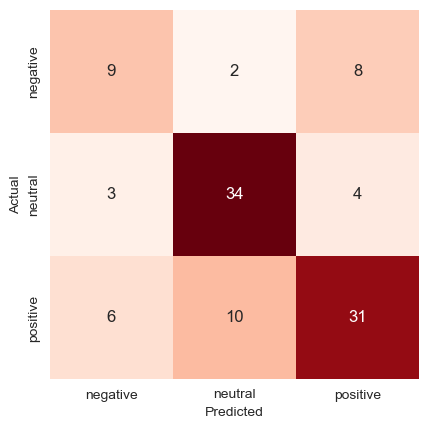

In [180]:
pipeAccuracy_Results(
    df=dff_emotionCount_polarity, 
    vectorizer=CountVectorizer(
        min_df=5,
        max_df=0.95,
        token_pattern=r'[a-zA-Z]+',
        stop_words='english',
        ngram_range=(1, 1)
    ), 
    features='Review Cleaned', 
    target='Classification', 
    test_size=0.33, 
    random_state=42, 
    model=DecisionTreeClassifier(max_depth=10, random_state=0)
)

Pipe Score: 0.9158878504672897
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83        18
     neutral       0.93      0.90      0.92        31
    positive       0.93      0.95      0.94        58

    accuracy                           0.92       107
   macro avg       0.90      0.89      0.90       107
weighted avg       0.92      0.92      0.92       107



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

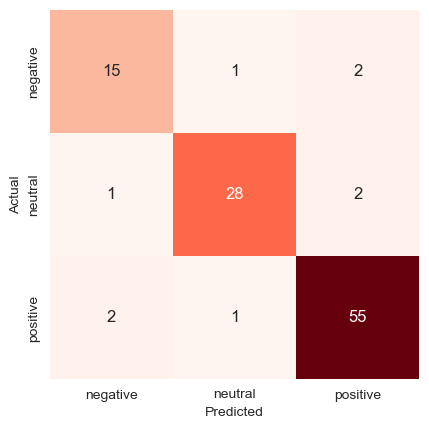

In [186]:
pipeAccuracy_Results(
    df=dff_textblob_polarity, 
    vectorizer=CountVectorizer(
        min_df=5,
        max_df=0.95,
        token_pattern=r'[a-zA-Z]+',
        stop_words='english',
        ngram_range=(1, 1)
    ), 
    features='Review Cleaned', 
    target='Classification', 
    test_size=0.33, 
    random_state=42, 
    model=DecisionTreeClassifier(max_depth=10, random_state=0)
)